# Ground State Preparation of SU(2) Lattice Gauge Theory in Quantum Computer

[Kogut-Susskind Hamiltonian](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.11.395) for SU(2) Gauge Theory is:
$$
H = \frac{g^2}{2}\sum_{\rm links} (E_i^a)^2 - \frac{2}{a^2g^2} \sum_{\rm plaquettes} Z({\bf n}) \,,
$$
where, a in the denominator is the lattice spacing and in the superscript denotes SU(2) gauge group indices that are implicitly summer over, g is the gauge coupling constant with mass dimension $[g] = 0.5$ in 2+1 dimensions, $i = x$ or $y$ denotes spatial directions (implicitly summed), $\bf{n} = (n_x, n_y)$ is a a lattice point and $Z(\bf{n})$ is the plaquette operator, $E_i^a$ is the electric field along $i$th spatial direction associated with gauge group index $a$. 

**Mapping onto Spin Chain:**
The Hamiltonian of the SU(2) gauge theory on a plaquette chain with a basis truncated at $j=1/2$ can be mapped onto a quantum spin chain, shown in 
$$ H = \frac{3}{2}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2} - \frac{3}{4}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2}\frac{\sigma_{i+1}^z+1}{2} - \frac{2}{a^2g^2} \sum_{i=0}^{N-1} \big(-0.5\big)^{\frac{\sigma_{i-1}^z+\sigma_{i+1}^z+ 2}{2}}
\sigma_i^x \,.$$
Up to an irrelevant constant, this Hamiltonian can be rewritten as (see Ref. [1](https://arxiv.org/abs/2103.05179) and [2](https://arxiv.org/abs/2205.09247)} for a similar expression)
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + h_x \sum_{i=0}^{N-1} \frac{1-3\sigma_{i-1}^z}{4} \frac{1-3\sigma_{i+1}^z}{4} \sigma_i^x \, ,$$

That is,
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$


where $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.

## ADAPT-VQE Algorithm for the Interacting Ground State Preparation

Here, we plan to use ADAPT-VQE algorithm for the ground state preparation of the SU(2) gauge theory in the quantum computer. Find reference here, [ADAPT (Adaptive Derivative-Assembled Problem-Tailored)](https://www.nature.com/articles/s41467-019-10988-2).

The total Hamiltonian is: $H = H_E + H_M$ where,

Electric Hamiltonian:
$$H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$$


Magnetic Hamiltonian:
$$H_M = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$

That is in terms of Pauli's (X, Z),
$$ H_{tot} = \sum_{i=0}^{N-1}  [J Z_i Z_{i+1} + h_z Z_i + \frac{h_x}{16} ( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})]$$

where, $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.


Now, let us define the hamiltonian denstiy as,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $


**ADAPT-VQE Algorithm:**

**Step 1:** Construct a pool of operators $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$ constrained by the symmetry of the system. 

The ADAPT-VQE depends on the choice of an efficient and scalable pool of operators. The operators need to be imaginary and anti-symmetric.


First, from the total hamiltonian, we can construct the operator pool $\{\hat{A}_1, \hat{A}_2, ..., \hat{A}_k\}$ that is not "imaginary and antisymmetric", taking the proper commutation of which we can get the operator pool $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$. Let's define the (real) operator pool as:

\begin{align*}
\hat{A}_1 &= Z_i \\
\hat{A}_2 &= Z_i Z_{i+1} \\
\hat{A}_3 &= X_i \\
\hat{A}_4 &= Z_{i-1} X_i \\
\hat{A}_5 &= X_i Z_{i+1} \\
\hat{A}_6 &= Z_{i-1} X_i Z_{i+1}
\end{align*}

Then, the operator pool to be used in ADAPT-VQE is:

\begin{align*}
\hat{O}_1 &= \sum_{i = 1}^{N-1} Y_i \\
\hat{O}_2 &= \sum_{i = 1}^{N-1} Y_i Z_{i+1} \\
\hat{O}_3 &= \sum_{i = 1}^{N-1} Z_i Y_{i+1} \\
\hat{O}_4 &= \sum_{i = 1}^{N-1} Z_{i-1} Y_i Z_{i+1} 
\end{align*}


**Step 2:** On the quantum device, initialize the quantum circuit the the current ansatz $\ket{\psi_{ansatz}}$ with desired quantum numbers and the symmetries of the target. The ansatz is dynamically created: $\cdots e^{i \theta_3  \hat{O}_3}e^{i \theta_2 \hat{O}_2}e^{i \theta_1 \hat{O}_1} \ket{\psi_{ref}}$. Here, in our case, let's take the ground state of the electric part of the total hamiltonian as our reference state: $\ket{\psi_{ref}} = \ket{11111 \cdots 11111}$ (all spins down -- obtained by applying X-gate to the initialized (at 0) quantum circuit).

**Step 3:** Each time add one operator that gives the largest gradient magnitude.

Measure the energy gradient $\frac{\partial E}{\partial \theta_i} |_{\theta_i=0}$ with respect to the variational parameter $\theta_i$ of the candidate pool operator $\hat{A}$. Repeat this step for every pool operator. Here, we measure the expectation value of the commutator of hamiltonian with each operator in the pool $\braket{\psi^{(k)}_{ansatz}|[\hat{H},\hat{O_i}]|\psi^{(k)}_{ansatz}} = \frac{\partial E}{\partial \theta_i} |_{\theta_i=0} = [\frac{\partial }{\partial \theta_i} \braket{\psi^{(k)}_{ansatz}|e^{-i \theta_i \hat{O}_i}H e^{i \theta_i \hat{O}_i}|\psi^{(k)}_{ansatz}}]|_{\theta_i=0}$ which gives the estimate of decrease in the energy by transforming the ansatz wavefunction from $\ket{\psi_{ansatz}} \rightarrow e^{i \theta_i \hat{O}}\ket{\psi_{ansatz}}$.

That is to say, add the operator $\hat{P}_n$ with the largest gradient norm to the ansatz with its variational parameter set to zero.

**Step 4:** Perform ordinary VQE to update all ansatz parameters. 

**Step 5:** Repeat steps 1 to 4 until convergence. That is if the measured expectation value is less than the tolerance/threshold $(\epsilon)$, then algorithm terminates as the ADAPT-VQE has converged.


After adding the operators, after k-th iteration, the ansatz has the form:

$\ket{\psi_k} = e^{i \theta_k \hat{O}_k}.....e^{i \theta_2 \hat{O}_2} e^{i \theta_1 \hat{O}_1} \ket{\psi_0} $,

and the energy gradient with respect to the variational parameter of the candidate operator $\hat{O}_i$, $\theta_i$ in the $(k+1)-th$ iteration, using the antihermiticity of the pool operators becomes.

In [1]:
# ## INSTALLATIONS REQUIRED
# !pip install qiskit[visualization]==1.1.0
# !pip install qiskit_aer
# !pip install qiskit qiskit-aer
# !pip install scipy
# !pip install numpy
# !pip install matplotlib
# !pip install qiskit-ibm-runtime
# !pip install -U sympy
# !pip install distinctipy
# !pip install pylatexenc
# !pip install prototype-zne
# !pip install physics-tenpy

In [2]:
import qiskit
qiskit.__version__

'1.1.1'

In [48]:
#import necessary libraries
import numpy as np
import random
import scipy.linalg as LA
from scipy.linalg import eig, eigh
from scipy.integrate import solve_ivp
from scipy.optimize import minimize, basinhopping
from qiskit import *
import matplotlib.pyplot as plt
import distinctipy
import matplotlib.ticker as ticker
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.quantum_info import Statevector
from qiskit.visualization import state_visualization
from qiskit.circuit import QuantumCircuit, Parameter
import qiskit.quantum_info as qi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2, Batch
from qiskit_ibm_runtime.options import EstimatorOptions, DynamicalDecouplingOptions
from qiskit.transpiler import CouplingMap
from qiskit.primitives import StatevectorEstimator, Estimator as AerEstimator
# from qiskit_ibm_runtime.fake_provider import FakeManilaV2
# from qiskit.primitives import BackendEstimator
# from qiskit.providers.fake_provider import GenericBackendV2

# from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator

## DMRG
# import tenpy
# from tenpy.networks.mps import MPS
# from tenpy.models.lattice import Chain
# from tenpy.models.spins import SpinModel
# from tenpy.algorithms.dmrg import dmrg
# from tenpy.tools.params import get_parameter

In [49]:
### HAMILTONIAN WITH PERIODIC BOUNDARY CONDITIONS
# the electric part of the Hamiltonian
def hamiltonian_elec(N, J, hz):
    """
    Constructs the electronic part of the Hamiltonian H_E for a system of N spins.

    Parameters: 
    N (int): Number of spins
    J (float): constant
    hz (float): another constant

    Returns:
    SparsePauliOp: SparsePauliOp object representing the electronic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []
    
    # Constructing the linear terms hz * sum(sigma_i^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(hz)
    
    # Constructing the interaction terms J * sum(sigma_i^z * sigma_{i+1}^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        z_term[(i + 1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(J)
    
    # Create SparsePauliOp for the Hamiltonian
    H_E = SparsePauliOp(pauli_list, coeffs)

    return H_E.simplify()

## magnetic hamiltonian
def hamiltonian_mag(N, hx):
    """
    Constructs the magnetic part of the Hamiltonian H_B for a system of N spins.
    
    Parameters:
    N (int): Number of spins
    hx (float): Constant parameter hx

    Returns:
    SparsePauliOp: SparsePauliOp object representing the magnetic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []

    factor = hx / 16

    for i in range(N):
        # Term: sigma_i^x
        x_term = ['I'] * N
        x_term[i] = 'X'
        pauli_list.append(Pauli(''.join(x_term)))
        coeffs.append(factor)

        # Term: -3 * sigma_{i-1}^z * sigma_i^x
        zx_term = ['I'] * N
        zx_term[(i-1) % N] = 'Z'
        zx_term[i] = 'X'
        pauli_list.append(Pauli(''.join(zx_term)))
        coeffs.append(-3 * factor)

        # Term: -3 * sigma_i^x * sigma_{i+1}^z
        xz_term = ['I'] * N
        xz_term[i] = 'X'
        xz_term[(i+1) % N] = 'Z' #periodic boundary condition (imposed by % sign)
        pauli_list.append(Pauli(''.join(xz_term)))
        coeffs.append(-3 * factor)

        # Term: 9 * sigma_{i-1}^z * sigma_i^x * sigma_{i+1}^z
        zxz_term = ['I'] * N
        zxz_term[(i-1) % N] = 'Z'
        zxz_term[i] = 'X'
        zxz_term[(i+1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(zxz_term)))
        coeffs.append(9 * factor)

    # Create SparsePauliOp for the Hamiltonian
    H_M = SparsePauliOp(pauli_list, coeffs)

    return H_M.simplify()

In [50]:
### FIND EXACT GROUND STATE OF HAMILTONIAN ###
def exact_ground_state(H):
    """
    Find the exact ground state of the Hamiltonian H.

    Parameters:
    - H: The Hamiltonian operator.

    Returns:
    - eigenvals: all the eigenvalues of H
    - eigenvecs: all the eigenvectors of H
    - energy_realgs: The ground state energy.
    - psi_realgs: The ground state vector.
    """

    # Compute Hamiltonian matrix
    H_matrix = H.to_matrix()  # H is a qiskit operator (defined above)

    # Classical ground state calculation (real GS) using scipy.linalg.eigh
    #eigenvals, eigenvecs = eig(H_matrix,right=True)   
    eigenvals, eigenvecs = eigh(H_matrix)
    
    # Find the ground state (eigenvector with the smallest eigenvalue)
    index_gs = np.argmin(eigenvals)
    energy_realgs = eigenvals[index_gs]
    psi_realgs = eigenvecs[:,index_gs] # Extract the eigenvector (column) corresponding to the smallest eigenvalue
    '''Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) 
    or a real symmetric matrix. Returns two objects, a 1-D array containing the eigenvalues of a, 
    and a 2-D square array or matrix (depending on the input type) of the 
    corresponding eigenvectors (in columns).'''
    
    # Normalize the ground state vector (optional)
    psi_realgs /= np.linalg.norm(psi_realgs)

    return eigenvals, eigenvecs, energy_realgs, psi_realgs

# find the overlap
def calc_overlap(psi_final, psi_realgs):
    #psi_final = Statevector(psi_final)
    # Convert psi_final to numpy array if it's not already
    psi_final = np.asarray(psi_final)
    psi_realgs = np.asarray(psi_realgs)
    
    psi_realgs_normal = psi_realgs / np.linalg.norm(psi_realgs)
    
    psi_final_normal = psi_final / np.linalg.norm(psi_final)
    
    overlap = np.abs(np.dot(psi_realgs_normal.conj(), psi_final_normal))**2
    
    return overlap

In [51]:
## The ground state (electric hamiltonian) as the initial ref state
## Let's make this the reference state
def initial_ref(N):
    circ = QuantumCircuit(N) #all in 0 states (up)
    for i in range(N):
        circ.x(i) #all 1 states #all down
    circ.barrier()
    # psi_known_gs = qi.Statevector.from_instruction(circ) # Quantum Index    
  
    #return circ, psi_known_gs
    return circ

In [59]:
### Define OBSERVABLE POOL 
## Operator Pool: {\sum_i Y_i, \sum_i Y_i Z_{i+1}, \sum_i Z_i Y_{i+1}, \sum_i Z_{i-1} Y_i Z_{i+1}}

def define_operator_pool(N):
    """
    Define the operator pool for a given lattice site and number of qubits.
    
    Parameters:
    N (int): The number of qubits (spins).

    Returns:
    dict: A dictionary where the keys are observable names and the values are SparsePauliOp objects.
    """
    
    # Define operator_pool with periodic boundary conditions
    operator_pool = {}

    # \Sum_i Y_i operators (e.g. for N = 3, YII, IYI, IIY)
    Y_ops = []
    for i in range(N):
        pauli_str = ['I'] * N
        pauli_str[i] = 'Y'
        Y_ops.append(''.join(pauli_str))
    operator_pool['Y'] = SparsePauliOp([Pauli(ps) for ps in Y_ops], coeffs=[1.0]*len(Y_ops)).simplify()

    # \Sum_i Y_i Z_i+1 operators (e.g. YZI, IYZ, etc.)
    YZ_ops = []
    for i in range(N):
        pauli_str = ['I'] * N
        pauli_str[i] = 'Y'
        pauli_str[(i+1) % N] = 'Z'
        YZ_ops.append(''.join(pauli_str))
    operator_pool['YZ'] = SparsePauliOp([Pauli(ps) for ps in YZ_ops], coeffs=[1.0]*len(YZ_ops)).simplify()

    # ZY operators (e.g. ZYI, IZ, etc.)
    ZY_ops = []
    for i in range(N):
        pauli_str = ['I'] * N
        pauli_str[i] = 'Z'
        pauli_str[(i+1) % N] = 'Y'
        ZY_ops.append(''.join(pauli_str))
    operator_pool['ZY'] = SparsePauliOp([Pauli(ps) for ps in ZY_ops], coeffs=[1.0]*len(ZY_ops)).simplify()

    # ZYZ operators (e.g. ZYZ, IZY, ...)
    ZYZ_ops = []
    for i in range(N):
        pauli_str = ['I'] * N
        pauli_str[i] = 'Z'
        pauli_str[(i+1) % N] = 'Y'
        pauli_str[(i+2) % N] = 'Z'
        ZYZ_ops.append(''.join(pauli_str))
    operator_pool['ZYZ'] = SparsePauliOp([Pauli(ps) for ps in ZYZ_ops], coeffs=[1.0]*len(ZYZ_ops)).simplify()

    return operator_pool

## APPLY UNITARY BASED ON THE OBSERVABLE INDEX
def apply_unitary(ansatz, theta_vals, operator_index):
    """
    Define unitary operations (into the quantum circuit) for the given operator pool.

    Parameters:
    qc: quantum circuit where we want to apply the unitary operator to
    lattice_site: where to apply unitary
    theta_vals: optimized parameter values [theta_1 for Y, theta_2 for YZ, theta_3 for ZY, theta_4 for ZYZ]
    obs_index: index of the observable in the observable pool

    Returns: quantum circuit after applying unitary corresponding to the observable index (in the observable pool)
    """
    # No of qubits
    N = ansatz.num_qubits

    qc = ansatz

    # Operator pool
    operator_pool = define_operator_pool(N) 

    # Ensure observable_index is within range
    if operator_index >= len(operator_pool):
        print(f"Operator index {operator_index} is out of range for the operator pool.")
        return qc
        
    # If within range, proceed
    name = list(operator_pool.keys())[operator_index]

    # Print the theta_vals
    # print("="*25)
    # print(f"Parameters, theta vals: {theta_vals}")
    # print("="*25)

    ## DEFINE REUSABLE FUNCTIONS FOR ZY, YZ and ZYZ (exp(i theta String)
    def func_zy(qc, i, j):
        qc.h(i)
        qc.s(i)
        qc.cx(i, j)
        qc.rz(-2 * theta_vals[operator_index], j)
        qc.cx(i, j)
        qc.sdg(i)
        qc.h(i)
        
    def func_yz(qc, i, j):
        qc.h(j)
        qc.s(j)
        qc.cx(i, j)
        qc.rz(-2 * theta_vals[operator_index], j)
        qc.cx(i, j)
        qc.sdg(j)
        qc.h(j)
        
    def func_zyz(qc, i, j, k):
        qc.h(j)
        qc.s(j)
        qc.cx(i,j)
        qc.cx(j,k)
        qc.rz(-2 * theta_vals[operator_index], k) # # exp(i theta_3 ZYZ) => rz(-2 * theta_3)
        qc.cx(j,k)
        qc.cx(i,j)
        qc.sdg(j)
        qc.h(j)
    
    # Apply unitary operations for each operator
    if name == 'Y': # \Prod_i exp(i theta_1 Y); Y = (HS) Z (HS)^dag
        for i in range(N):
            qc.ry(-2 * theta_vals[operator_index], i)  ## exp(i theta_1 Y); Y = (HS) Z (HS)^dag
        
        qc.barrier()
        
        print("="*25)
        print(f"==> Applied Unitary: \Prod_i exp(-i ({theta_vals[operator_index]}) {name})")
        print("="*25)

    elif name == 'YZ':  # exp(i theta_2 YZ); YZ = (HS) ZZ (HS)^dagger
         # Apply YZ terms (first column: 0-1, 2-3, 4-5, 6-7, etc.)
        for i in range(0, N-1, 2):
            if i+1 < N:
                func_yz(qc, i, i+1)     
        qc.barrier()
         # Apply YZ erms (second column: 1-2, 3-4, 5-6, 7-8, etc.)
        for i in range(1, N-1, 2):
            if i+1 < N:
                func_yz(qc, i, i+1)
        qc.barrier()
        
        # Apply YZ terms (PERIODIC) (last and first terms)
        if N > 1:
            func_yz(qc, 0, N-1)
        
        qc.barrier()

        print("="*25)
        print(f"==> Applied Unitary: \Prod_i exp(-i ({theta_vals[operator_index]}) {name})")
        print("="*25)

    elif name == 'ZY': # exp(i theta_3 ZY)
         
        # Apply ZY terms (first column: 0-1, 2-3, 4-5, 6-7, etc.)
        for i in range(0, N-1, 2):
            if i+1 < N:
                func_zy(qc, i, i+1)     
        qc.barrier()
         # Apply ZY terms (second column: 1-2, 3-4, 5-6, 7-8, etc.)
        for i in range(1, N-1, 2):
            if i+1 < N:
                func_zy(qc, i, i+1)
        qc.barrier()
        # Apply ZY terms (PERIODIC) (last and first terms)
        if N > 1:
            func_zy(qc, 0, N-1)
        
        qc.barrier()

        print("="*25)
        print(f"==> Applied Unitary: \Prod_i exp(-i ({theta_vals[operator_index]}) {name})")
        print("="*25)

    elif name == 'ZYZ': # exp(i theta_4 ZYZ)
        # Apply ZYZ terms in overlapping triplets
        
        # Apply ZYZ terms (first column: 0-1-2, 3-4-5, 6-7-8, etc.)
        for i in range(0, N-2, 3):
            if i+2 < N:
                func_zyz(qc, i, i+1, i+2)
        qc.barrier()

        # Apply ZYZ terms (second column: 1-2-3, 4-5-6, 7-8-9, etc.)
        for i in range(1, N-2, 3):
            if i+2 < N:
                func_zyz(qc, i, i+1, i+2)
        qc.barrier()
        
        # Apply ZYZ terms (third column: 2-3-4, 5-6-7, 8-9-10, etc.)
        for i in range(2, N-2, 3):
            if i+2 < N:
                func_zyz(qc, i, i+1, i+2)
        qc.barrier()
             
        # Apply ZYZ term for periodic boundary condition
        if N > 2:
            func_zyz(qc, N - 2, N - 1, 0)
            func_zyz(qc, N - 1, 0, 1)
        qc.barrier()
        
        print("="*25)
        print(f"==> Applied Unitary:  \Prod_i exp(-i ({theta_vals[operator_index]}) {name})")
        print("="*25)
    
    return qc

In [60]:
# ansatz = QuantumCircuit(5)
# theta_vals = [1,1,1,1]
# operator_index = 3
# apply_unitary(ansatz, theta_vals, operator_index)
# ansatz.draw()

In [101]:
### Functions to Measure Expectation Value 
def measure_exact_expectation_value(qc, observable):
    # print("Computing exact expectation value for observables")
    
    # # ## Ref: https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer
    aer_sim = AerSimulator(method="automatic")
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
    isa_qc = pm.run(qc)
    isa_observable = observable.apply_layout(isa_qc.layout)

    # ## ## USING QISKIT.PRIMITIVES ESTIMATOR: EXACT
    # ## (SHOTS = NONE Gives Exact: https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator)
    est_exact = AerEstimator() 
    job_exact = est_exact.run(isa_qc, isa_observable, parameter_values=None, shots=None)
    result_exact = job_exact.result()
    exact_exp = result_exact.values[0]

    # estimator = StatevectorEstimator()
    # pub = (qc, observable)
    # exact_exp = estimator.run([pub]).result()[0].data.evs

    return exact_exp

## FIND THE COMMUTATORS [H_total, A_i]: USED TO GET THE GRADIENT OF ENERGY
def commutator_pauli(op1, op2):
    """
    ### Compute the commutator [op1, op2] where op1 and op2 are SparsePauliOps.    
    Parameters:
    op1 (SparsePauliOp): The first Pauli operator.
    op2 (SparsePauliOp): The second Pauli operator.
    ### Returns:
    SparsePauliOp: The commutator [op1, op2].
    """
    ## # commutator is [op1, op2] = op1 * op2 - op2 * op1
    # comm = ((op1 @ op2).simplify() - (op2 @ op1).simplify())
    comm = (op1 @ op2 - op2 @ op1).simplify()
    # print("Commutator: ", comm)
    return comm

def commutator_hamiltonian(H_total, operator_pool):
    """
    Calculate the commutator i[H_total, O_i] for each operator O_i in the operator pool.
    
    Parameters:
    H_total (SparsePauliOp): The total Hamiltonian.
    operator_pool (dict): The dictionary of operators {O_i}.
    
    Returns:
    dict: A dictionary with commutators [H_total, O_i] for each operator O_i in the operator pool.
    """
    commutators = {}
    
    for operator_name, operator in operator_pool.items():
        comm = None  # Start with None to accumulate terms
        for h_term, h_coeff in zip(H_total.paulis, H_total.coeffs):
            for a_term, a_coeff in zip(operator.paulis, operator.coeffs):
                # Compute commutator of individual terms
                comm_term = commutator_pauli(SparsePauliOp([h_term], [h_coeff]), SparsePauliOp([a_term], [a_coeff]))
                
                # Accumulate commutators
                if comm is None:
                    comm = comm_term
                else:
                    comm += comm_term
        
        commutators[operator_name] = 1j*comm.simplify()

        # #check if the i [H, O_i] is hermitian of not
        # print("="*50)
        # comm_matrix = (1j * comm).to_matrix()
        # # print(f"i[H_total, {operator_name}]: {1j*comm.simplify()}")
        # print(f"For i[H_tot, \sum_i {operator_name}], is Hermitian: ", np.allclose(comm_matrix, comm_matrix.conj().T))
        # print("="*50)   
        
    return commutators

### measure gradient: <psi | i [H_total, O_i] psi >
def measure_gradient(H_total, operator_pool, qc):
    """
    Measure the gradient
    
    Parameters:
    H_total (SparsePauliOp): The total Hamiltonian.
    observable_pool (dict): Dictionary of observables {O_1, O_2, O_3, O_4}.
    qc (QuantumCircuit): Quantum circuit to measure expectation values.
    shots (int): Number of shots for statistical measurements.
    exact_cache (dict): Cache for exact expectation values.

    Returns:
    dict: A dictionary with (the norm of) gradients for each operator.
    """
    
    gradients = {}

    # State Vector of the qc (gives a ket vector)
    psi_ket = qi.Statevector.from_instruction(qc).data
    psi_ket_norm = psi_ket/np.linalg.norm(psi_ket) # normalized state
    psi_bra = psi_ket_norm.conj().T  # Hermitian conjugate
    
    # Calculate commutators i [H_total, O_i] for all operators in the pool
    commutators = commutator_hamiltonian(H_total, operator_pool)

    # Compute the gradients of each opertors, that is  <psi | i [H_total, O_i] psi >   
    for operator_name, comm in commutators.items():   
        # Measure expectation value of the commutator: psi_bra * i[H, A_i] * psi_ket
        # USE MATRIX MULTIPLICATION
        # Commutator matrix
        comm_matrix = comm.to_matrix()
        # psi_new = comm_matrix @ psi_ket_norm # comm_matrix should act on psi_ket_norm
        # exact_exp = psi_bra.dot(psi_new).real # < psi_bra | i[H,A_i] | psi_ket >
        # gradients[operator_name] = exact_exp # np.linalg.norm(exact_exp)
        ### Other Matrix Way
        # exact_exp = np.inner(np.conj(psi_ket_norm).T, np.matmul(comm_matrix, psi_ket_norm)).real
        # gradients[operator_name] = exact_exp
        
        # USE PREVIOUS FUNCTION TO GET THIS <psi | i[H_total, O_i] | psi>
        exact_exp_qiskit = measure_exact_expectation_value(qc, comm)
        gradients[operator_name] = exact_exp_qiskit
        
        # print("-"*50)
        # print("Gradients using Matrix Method: ", np.linalg.norm(exact_exp))
        # print("-"*50)
        # print("Gradients using Qiskit: ", np.linalg.norm(exact_exp_qiskit))
        # print("-"*50)
    
    return gradients

Applied \Prod_i Exp(-i * 0.30219728932326667 * Y) to GS of H_E !!!
     ┌───┐ ░ ┌──────────────┐
q_0: ┤ X ├─░─┤ Ry(-0.60439) ├
     ├───┤ ░ ├──────────────┤
q_1: ┤ X ├─░─┤ Ry(-0.60439) ├
     ├───┤ ░ ├──────────────┤
q_2: ┤ X ├─░─┤ Ry(-0.60439) ├
     ├───┤ ░ ├──────────────┤
q_3: ┤ X ├─░─┤ Ry(-0.60439) ├
     ├───┤ ░ ├──────────────┤
q_4: ┤ X ├─░─┤ Ry(-0.60439) ├
     └───┘ ░ └──────────────┘
=== Calculating energy ===
Theta_3:  -3.141592653589793
==> Applied Unitary:  \Prod_i exp(-i (theta_3) ZYZ)
Num of Params:  1
ho H_tot)): -9.778608609997935
Energy (<psi|H_tot|psi>: Matrix Multiplication): -9.778608609997963
Energy (<psi|H_tot|psi>: Qiskit Primitives):  -9.778608609997967
Energy Gradients (<psi |[H_tot, \sum_i ZYZ]| psi>):  9.027402284988394
=== Calculating energy ===
Theta_3:  -2.8108986900540254
==> Applied Unitary:  \Prod_i exp(-i (theta_3) ZYZ)
Num of Params:  1
ho H_tot)): -7.695515674020369
Energy (<psi|H_tot|psi>: Matrix Multiplication): -7.695515674020385
Energy (<psi|H_t

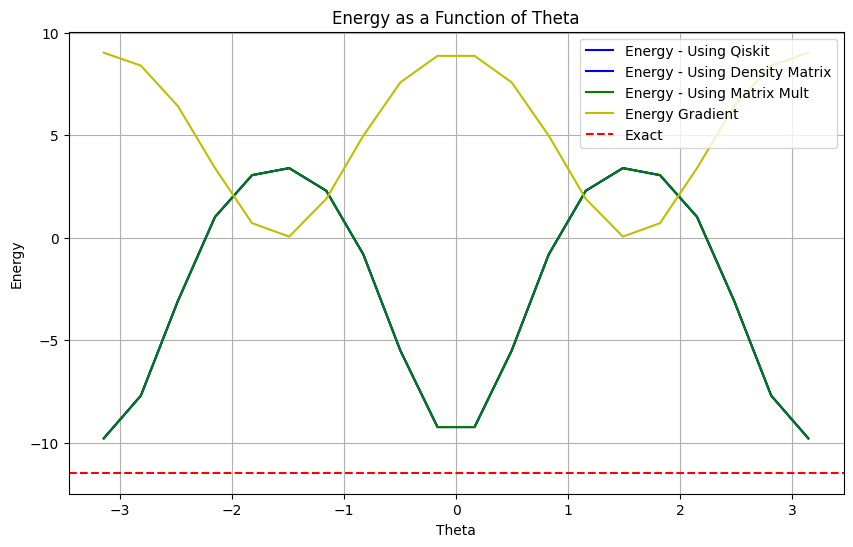

In [108]:
## CHECKING WORKING OF PREVIOUS FUNCTIONS: GRADIENT AND OTHERS

### Define constants
N = 5  # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 2.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2  

# Calculate Hamiltonian
# print("=============================>>> Hamiltonian <<<================================")
H_elec = hamiltonian_elec(N, J, hz)
H_mag = hamiltonian_mag(N, hx)
H_tot = H_elec + H_mag
# print("="*50)
# print("Total Hamiltonian: ", H_tot)
# print("="*50)
# ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
_, _, gs_exact, _ = exact_ground_state(H_tot)  
# print("Exact Ground State Energy of The Total Hamiltonian: ", energy_realgs)
     
# define theta values: Parameters
theta_0 = Parameter("theta_0")
theta_1 = Parameter("theta_1")
theta_2 = Parameter("theta_2")
theta_3 = Parameter("theta_3")

theta_vals = [theta_0, theta_1, theta_2, theta_3]
    
theta_range = np.linspace(-np.pi, np.pi, 20)

## Ground State of Electric Hamiltonian
ansatz = initial_ref(N)

## Operator Pool
operator_pool = define_operator_pool(N)

print("Applied \Prod_i Exp(-i * 0.30219728932326667 * Y) to GS of H_E !!!")
for lattice_site in range(N):
    ansatz.ry(-2 * 0.30219728932326667, lattice_site) 

ansatz = ansatz.copy()

print(ansatz.draw())

## initialize the energy values
energies = []
energies_matrix = []
energies_dmat = []
energies_grads = []

for theta in theta_range:
    print("=== Calculating energy ===")  

    # Theta Value
    print("Theta_3: ", theta)
    print("="*100)
    
    qc = ansatz.copy()

    #print(qc.draw())
    
    ## Apply \Prod_i Exp(-i * theta_3 * ZYZ)
    operator_index = 3 # for ZYZ, operator index is 3
    qc_param = apply_unitary(qc, theta_vals, operator_index)
    
    print("Num of Params: ", qc_param.num_parameters)
    # print("Parametric Circuit:")
    # print(qc_param.draw())
    
    # print("Circuit with Parameters Assigned:")
    # assign parameters: theta values
    qc_new = qc_param.assign_parameters({theta_3: theta})
    #print(qc_new.draw())   
    
    ### Get the expectation value of the total hamiltonian using matrix method
    # density matrix way
    rho = qi.DensityMatrix.from_instruction(qc_new).data
    energy_dmat = np.trace(rho.dot(H_tot.to_matrix())).real
    print("Energy (<psi|H_tot|psi> = Tr(\rho H_tot)):", energy_dmat) 
    energies_dmat.append(energy_dmat)
    
    # Statevector way
    statevector = Statevector.from_instruction(qc_new)
    statevector_norm = statevector/np.linalg.norm(statevector)
    energy_matrix = np.inner(np.conj(statevector_norm).T, np.matmul(H_tot.to_matrix(), statevector_norm)).real
    print("Energy (<psi|H_tot|psi>: Matrix Multiplication):", energy_matrix)      
    energies_matrix.append(energy_matrix)  
    
    ## Find the expectation value of the energy
    energy = measure_exact_expectation_value(qc_new, H_tot)
    energies.append(energy)
    print("Energy (<psi|H_tot|psi>: Qiskit Primitives): ", energy)
    print("="*50)


    ## Calculate the gradient of the operator
    zyz_grad = measure_gradient(H_tot, operator_pool, qc_new).get('ZYZ')
    print("Energy Gradients (<psi |[H_tot, \sum_i ZYZ]| psi>): ", zyz_grad)
    energies_grads.append(zyz_grad)

    
# Find the index of the minimum energy
min_energy_index = np.argmin(energies)
min_energy_theta = theta_range[min_energy_index]   

print('Minimum Energy: ', min(energies))    
print('Theta corresponding to Minimum Energy: ', min_energy_theta)
print('Exact Ground State Energy: ', gs_exact)  
# Plot the energy as a function of theta
plt.figure(figsize=(10, 6))
plt.plot(theta_range, energies, color='b', label='Energy - Using Qiskit')
plt.plot(theta_range, energies_dmat, color='b', label='Energy - Using Density Matrix')
plt.plot(theta_range, energies_matrix, color='g', label='Energy - Using Matrix Mult')
plt.plot(theta_range, energies_grads, color='y', label='Energy Gradient')
plt.xlabel('Theta')
plt.ylabel('Energy')
plt.title('Energy as a Function of Theta')
plt.axhline(y=gs_exact, color='r', linestyle='--', label='Exact')
plt.legend()
plt.grid(True)
plt.savefig(f'Energy vs Theta After Applying Prod_i Exp(- i theta_3 ZYZ)_to_ref1_g={g}.pdf')
plt.show()

In [106]:
### Calculating the Cost Function For VQE (Optimization of Parameters for min Cost)
## COST FUNCTION: EXPECTATION VALUE OF THE ENERGY FOR GIVEN QUANTUM CIRCUIT <psi(theta)|H|psi(theta)>
def cost_func_vqe(theta_vals, hamiltonian, ansatz):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    print("Initial Params", theta_vals)
    
    estimator = StatevectorEstimator()
    pub = (ansatz, hamiltonian, theta_vals)
    cost = estimator.run([pub]).result()[0].data.evs

    print("Cost: ", cost)
    # cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

================++++++++================>>> PERFORMING ADAPT-VQE <<<===============++++++++==================
Spins (N): 5, Coupling (g) : 1.0
==================>>> STEP 1 : DEFINE OPERATOR POOL
 --------------------------------------------------------------------------
INITIAL REFERENCE STATE : 
 --------------------------------------------------------------------------
Total Number of Iterations = 5
 --------------------------------------------------------------------------


 --------------------------------------------------------------------------
                         ADAPT-VQE iteration:  5
 --------------------------------------------------------------------------


==================>>> STEP 2 : INITIALIZE THE ANSATZ AND OUTPUT ANSATZ INFO
Circuit Depth: 2
==================>>> STEP 3 : CALCULATING GRADIENT OF OPERATORS
Gradients:  {'Y': -0.0893093678173067, 'YZ': 6.641781936848298, 'ZY': 6.641781936848296, 'ZYZ': -11.835183198058107}
Maximum Gradient:  6.641781936848298
==

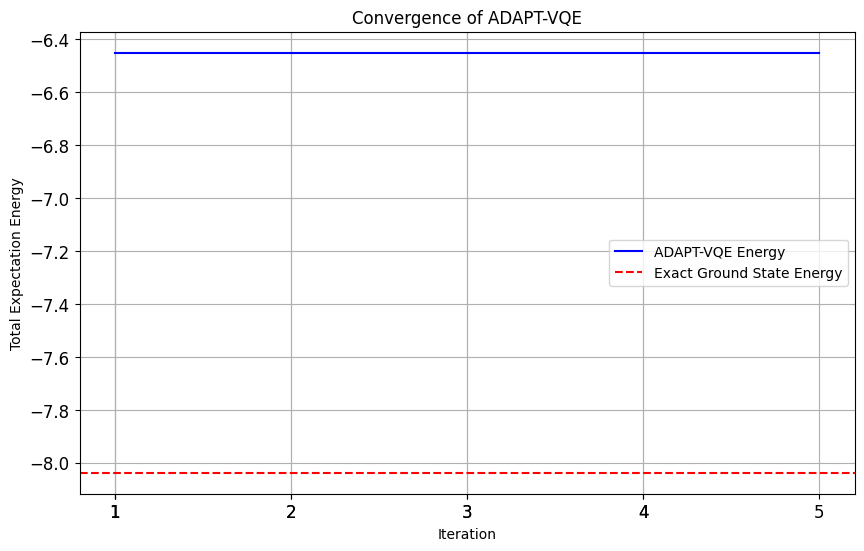

In [107]:
################ PERFORMING ADAPT-VQE ####################
### Define constants
N = 5 # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 1.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2 

# Calculate Hamiltonian
H_E = hamiltonian_elec(N, J, hz)
H_M = hamiltonian_mag(N, hx)
H_tot = H_E + H_M
_, _, gs_exact, psi_realgs = exact_ground_state(H_tot) # exact gs energy calculation

print("================++++++++================>>> PERFORMING ADAPT-VQE <<<===============++++++++==================")
print(f"Spins (N): {N}, Coupling (g) : {g}")

## ADAPT - VQE
tolerance = 1e-3 # convergence threshold
n_iter = 5 # no of iterations

# STEP 1: Operator Pool
print("==================>>> STEP 1 : DEFINE OPERATOR POOL")
operator_pool = define_operator_pool(N)
# print("Operator Pool: ", operator_pool)
print(" --------------------------------------------------------------------------")
# Initialize lists to store iteration & expectation values
iterations = []
expectation_energies = []
# theta_vals = []  # Start with an empty list for theta values
selected_operators = []  # To keep track of already selected operators
last_applied_operator = None # Initialize a variable to store the last applied operator

## PARAMETERS CORRESPONDING TO THE OPERATORS IN THE POOL {Y, YZ, ZY, ZYZ}
## Initialize / define theta values: Parameters
theta_0 = Parameter("theta_0")
theta_1 = Parameter("theta_1")
theta_2 = Parameter("theta_2")
theta_3 = Parameter("theta_3")

theta_vals = [theta_0, theta_1, theta_2, theta_3]

optimized_theta_vals = [0] * len(theta_vals)

print("INITIAL REFERENCE STATE : ")
##  ref state (or initial_ansatz)
initial_ansatz = initial_ref(N)
## theta_0 = 0.30219728932326667 
## (gives minimum energy: -6.450501169242453; exact for g = 1: -8.037312423799293)
## Applying \Prod_i Exp(-i theta_0 Y) to Electric Ground State
for lattice_site in range(N):
    initial_ansatz.ry(-2 * 0.30219728932326667, lattice_site) 
    
qc = initial_ansatz.copy()
qc.barrier()
# print(qc.draw())

print(" --------------------------------------------------------------------------")
print(f"Total Number of Iterations = {n_iter}" )
print(" --------------------------------------------------------------------------")

## MAIN LOOP for ADAPT-VQE
for iteration in range(n_iter):
    print("\n")
    print(" --------------------------------------------------------------------------")
    print("                         ADAPT-VQE iteration: ", n_iter)
    print(" --------------------------------------------------------------------------")
    print("\n")
    ### STEP 2: Initialize Ansatz (and output ansatz info)
    print("==================>>> STEP 2 : INITIALIZE THE ANSATZ AND OUTPUT ANSATZ INFO")
    print(f"Circuit Depth: {qc.depth()}")
    # print(qc.draw())
        
    ### STEP 3: Measure the gradient (commutator expectation value) for each operator
    print("==================>>> STEP 3 : CALCULATING GRADIENT OF OPERATORS")
    gradients = measure_gradient(H_tot, operator_pool, qc)
    print("Gradients: ", gradients)
    print("Maximum Gradient: ", np.max(list(gradients.values())))

    # Extract gradient values and corresponding keys (indices)
    gradient_values = np.array(list(gradients.values()))
    gradient_keys = list(gradients.keys())

    ### STEP 4: Find the operator with the largest commutator / Gradient
    print("==================>>> STEP 4 : FINDING THE MAXIMUM GRADIENT OPERATOR")
    max_gradient_idx= np.argmax(gradient_values)
    max_gradient_op = gradient_keys[max_gradient_idx]  # This is a string like 'Y', 'YZ', etc.
    max_gradient = gradients[max_gradient_op]
    print(f"Operator with largest gradient: {max_gradient_op}, Gradient: {max_gradient}")

    # Compare with the last applied operator
    if last_applied_operator is not None:
        if max_gradient_op == last_applied_operator:
            print(f"Warning: The current operator ({max_gradient_op}) is the same as the last applied operator.")
            
            # Find the operator with the second largest gradient
            sorted_indices = np.argsort(gradient_values)[::-1]  # Sort gradients in descending order
            for idx in sorted_indices:
                if gradient_keys[idx] != last_applied_operator:
                    max_gradient_idx = idx
                    max_gradient_op = gradient_keys[max_gradient_idx]
                    max_gradient = gradient_values[max_gradient_idx]
                    print(f"Applying the second largest gradient operator instead: {max_gradient_op}, Gradient: {max_gradient}")
                    break
        else:
            print(f"WARNING: The current operator ({max_gradient_op}) is different from the last applied operator ({last_applied_operator}).")
    else:
        print("This is the first iteration, so no previous operator to compare with.")


    # Update the last applied operator to the current one
    last_applied_operator = max_gradient_op

    # Store the chosen operators
    selected_operators.append(max_gradient_op)
    
    if np.linalg.norm(gradient_values) < tolerance:
        print(f"Terminating: Pool Gradient Norm: {np.linalg.norm(gradient_values)} is below the threshold: {tolerance}.")
        break            
  
    ### STEP 5: Use VQE to optimize theta values
    print("==================>>> STEP 5 : PERFORMING VQE: Minimizing Cost & Optimizing Parameters")
    # Parameterized Ansatz After Applying Unitary corresponding to the Maximum gradient norm Operator 
    ansatz_to_optimize = apply_unitary(qc, theta_vals, max_gradient_idx)
    print("Number of Parameters: ", ansatz_to_optimize.num_parameters)
    # print(ansatz_to_optimize.draw())
    ### PERFORM VQE: Optimizing the parameters: Minimize the Cost
    # Initialize history tracking
    cost_history = []
    
    def callback(x):
        energy = cost_func_vqe(x, H_tot, ansatz_to_optimize)
        cost_history.append(energy)
    
    ## Optimize the new theta value for the selected operator
    ## scipy.optimize.minimize(func, x0, ...) or scipy.optimize.basinhopping
    ## other options available: L-BFGS-B, COBYLA, BFGS, etc 
    initial_theta_vals = [random.uniform(0, np.pi)]*ansatz_to_optimize.num_parameters
    # initial_theta_vals = np.random.uniform(-np.pi, np.pi, ansatz_to_optimize.num_parameters).tolist()
    opt = minimize(cost_func_vqe, initial_theta_vals, args=(H_tot, ansatz_to_optimize), method='COBYLA', callback=callback)
    print(f"Optimized theta values: {opt.x}")
    print(f"Cost function after optimization: {opt.fun}")

    # update optimized_theta value
    optimized_theta_vals[max_gradient_idx] = opt.x.item() if isinstance(opt.x, np.ndarray) else opt.x
    print("Optimized Theta Values: ", optimized_theta_vals)
    
    ### STEP 6: Update the ansatz with the operator that has the largest gradient
    # bind parameters to create an optimized circuit
    print("==================>>> STEP 6 : UPDATING ANSATZ WITH OPTIMIZED PARAMETERS")
    qc = ansatz_to_optimize.assign_parameters(opt.x)
    qc.barrier()
    # print(qc.draw())
    
    # get the statevector
    psi_adaptvqe = qi.Statevector.from_instruction(qc)
    
    # Calculate the overlap
    print(f"Overlap with Exact GS: {calc_overlap(psi_adaptvqe, psi_realgs)*100:.3f}%")

    # Store the iteration number and the expectation value
    iterations.append(iteration + 1)
    expectation_energies.append(opt.fun)

    ### CHECK CONVERGENCE
    if np.abs(opt.fun - gs_exact) < tolerance:
        print("="*25)
        print(f"SUCCESSFULLY CONVERGED!!!")
        break
    else:
        print(f">>> Did NOT converge in {iteration+1} iterations! <<<")

print("================++++================>>> ADAPT-VQE DONE <<<===============++++++++==================")
# Final results
final_cost = measure_exact_expectation_value(qc, H_tot)
print(f"\n Final Expectation Value of the Total Hamiltonian: {final_cost}")

# ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
print("-"*100)
print("Exact Ground State Energy of The Total Hamiltonian: ", gs_exact)
print("-"*100)
print("\n")
print("===>>>> PLOTTING THE RESULTS:")
# Plotting the convergence of ADAPT-VQE
# Select a subset of iterations for xticks
num_ticks = 10 
tick_positions = np.linspace(min(iterations), max(iterations), num_ticks, dtype=int)

# Plotting the convergence of ADAPT-VQE
plt.figure(figsize=(10, 6))
plt.plot(iterations, expectation_energies, linestyle='-', color='b', label='ADAPT-VQE Energy')
plt.axhline(y=gs_exact, color='r', linestyle='--', label='Exact Ground State Energy')
plt.xlabel('Iteration')
plt.xticks(tick_positions, fontsize=12)  # Use the selected subset for xticks
plt.yticks(fontsize=12)
plt.ylabel('Total Expectation Energy')
plt.title('Convergence of ADAPT-VQE')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig(f'adapt_vqe_convergence_Spins{N}_Iters{n_iter}_g{g}.png', dpi=300)  # Save as PNG with 300 dpi

# Show the figure
plt.show()

In [ ]:
# ### Calculating the Cost Function For VQE (Optimization of Parameters for min Cost)
# ## COST FUNCTION: EXPECTATION VALUE OF THE ENERGY FOR GIVEN QUANTUM CIRCUIT <psi(theta)|H|psi(theta)>
# def cost_func_vqe(theta_vals, hamiltonian, ansatz):
#     """Return estimate of energy from estimator

#     Parameters:
#         theta_vals (ndarray): Array of ansatz parameters
#         ansatz (QuantumCircuit): Parameterized ansatz circuit
#         hamiltonian (SparsePauliOp): Operator representation of Hamiltonian

#     Returns:
#         float: Energy estimate
#     """
#     print("Initial Params", theta_vals)
    
#     # Assign the values of theta_vals to the ansatz
#     param_dict = {param: val for param, val in zip(ansatz.parameters, theta_vals)}
#     ansatz.assign_parameters(param_dict, inplace=True)

#     # Display the circuit with assigned parameters
#     # print(ansatz.draw())

#     # Compute the cost (energy expectation value)
#     cost = measure_exact_expectation_value(ansatz, hamiltonian)
#     print("Cost: ", cost)
    
#     return cost

In [13]:
# ## CHECKING WORKING OF PREVIOUS FUNCTIONS: GRADIENT AND OTHERS

# ### Define constants
# N = 5  # Number of spins
# a = 1.0  # Lattice spacing

# # coupling constants 
# g = 1.0

# # Calculate Hamiltonian parameters
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2  

# # Calculate Hamiltonian
# # print("=============================>>> Hamiltonian <<<================================")
# H_elec = hamiltonian_elec(N, J, hz)
# H_mag = hamiltonian_mag(N, hx)
# H_tot = H_elec + H_mag
# # print("="*50)
# # print("Total Hamiltonian: ", H_tot)
# # print("="*50)
# # ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
# _, _, gs_exact, _ = exact_ground_state(H_tot)  
# # print("Exact Ground State Energy of The Total Hamiltonian: ", energy_realgs)
     
# # define theta values: Parameters
# theta_0 = Parameter("theta_0")
# theta_1 = Parameter("theta_1")
# theta_2 = Parameter("theta_2")
# theta_3 = Parameter("theta_3")

# theta_vals = [theta_0, theta_1, theta_2, theta_3]
    
# theta_range = np.linspace(0, np.pi, 500)

# print("=== Calculating energy ===")
# energies = []

# for theta in theta_range:
#     # Theta Value
#     print("Theta_0: ", theta)
    
#     ## Apply Unitary
#     operator_index = 0 # for Y, operator index is 0
#     ansatz = initial_ref(N)
#     print("=== Applying \Prod_i Exp(-i theta_0 Y) ===")
#     for lattice_site in range(N):
#         ansatz.ry(-2 * theta_vals[operator_index], lattice_site)
        
#     qc_param = ansatz
#     qc_param.barrier()
#     print("Num of Params: ", qc_param.num_parameters)
#     print("Parametric Circuit:")
#     print(qc_param.draw())

#     print("="*50)
#     print("Circuit with Parameters Assigned:")
#     # assign parameters: theta values
#     qc = qc_param.assign_parameters({theta_0: theta})
#     print(qc.draw())   
    
#     ### Get Norm to See if it's normalized
#     statevector = Statevector.from_instruction(qc)
#     norm = np.linalg.norm(statevector)
#     print("Norm of the Quantum State:", norm)      
    
#     # Find the energy
#     energy = measure_exact_expectation_value(qc, H_tot)
#     energies.append(energy)
#     print("Energy: ", energy)
#     print("="*50)
#     print("="*50)
    
# # Find the index of the minimum energy
# min_energy_index = np.argmin(energies)
# min_energy_theta = theta_range[min_energy_index]   

# print('Minimum Energy: ', min(energies))    
# print('Theta corresponding to Minimum Energy: ', min_energy_theta)
# print('Exact Ground State Energy: ', gs_exact)  
# # Plot the energy as a function of theta
# plt.figure(figsize=(10, 6))
# plt.plot(theta_range, energies, color='b')
# plt.xlabel('Theta')
# plt.ylabel('Energy')
# plt.title('Energy as a Function of Theta')
# plt.axhline(y=gs_exact, color='r', linestyle='--', label='Exact')
# plt.legend()
# plt.grid(True)
# plt.savefig(f'Energy vs Theta After Applying Prod_i Exp(- i theta Y)_g={g}.pdf')
# plt.show()

In [24]:
# #### PERFORMING ONE STEP / ITERATION OF ADAPT-VQE: 
# ### CHECKING CONSISTENCY OF PREVIOUS FUNCTIONS

# ### Define constants
# N = 5  # Number of spins
# a = 1.0  # Lattice spacing

# # coupling constants 
# g = 1.0

# # Calculate Hamiltonian parameters
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2  

# # Calculate Hamiltonian
# H_elec = hamiltonian_elec(N, J, hz)
# H_mag = hamiltonian_mag(N, hx)
# H_tot = H_elec + H_mag

# print("=== Initial Reference State ===")
# # ref state (or initial_ansatz)
# initial_ansatz = initial_ref(N)
# ## theta_0 = 0.30219728932326667 
# ## (gives minimum energy: -6.450501169242453; exact for g = 1: -8.037312423799293)
# ## Applying \Prod_i Exp(-i theta_0 Y) to Electric Ground State
# for lattice_site in range(N):
#     initial_ansatz.ry(-2 * 0.30219728932326667, lattice_site) 
  
# # print(initial_ansatz.draw())

# ## Calculate the Gradient
# print("====================>>> CALCULATING GRADIENT OF THE OPERATORS <<<=======================")
# operator_pool = define_operator_pool(N)
# gradients = measure_gradient(H_tot, operator_pool, initial_ansatz)
# print("Gradients: ", gradients)
# print("Maximum Gradient: ", np.max(list(gradients.values())))
# max_grad_op_idx = np.argmax(list(gradients.values()))

# ## Parameters (parametric and optimized)
# ## define theta values: Parameters
# theta_0 = Parameter("theta_0")
# theta_1 = Parameter("theta_1")
# theta_2 = Parameter("theta_2")
# theta_3 = Parameter("theta_3")
# theta_vals = [theta_0, theta_1, theta_2, theta_3]

# # Initialize / Store the Optimized Parameters
# optimized_theta_vals = [0] * len(theta_vals)

# print("==============>>> PERFORMING VQE: Minimizing Cost & Optimizing Parameters <<<===============")
# # Parameterized Ansatz After Applying Unitary corresponding to the Maximum gradient norm Operator 
# ansatz_to_optimize = apply_unitary(initial_ansatz, theta_vals, max_grad_op_idx)
# print("Number of Parameters: ", ansatz_to_optimize.num_parameters)
# print("-"*50)
# # print("Parametric Quantum Circuit for Optimization:")
# # print(ansatz_to_optimize.draw())

# ### Initial Parameters (Theta Values)
# initial_theta_vals = [random.uniform(0, np.pi)]*ansatz_to_optimize.num_parameters
# # print("Checking Cost with Initial Params: ", cost_func_vqe(initial_theta_vals, H_tot, ansatz_to_optimize))
  
# ### PERFORM VQE: Optimizing the parameters: Minimize the Cost
# ## scipy.optimize.minimize(func, x0, ...) or scipy.optimize.basinhopping
# ## other options available: L-BFGS-B, COBYLA, BFGS, etc

# ## Print on Screen during Minimization
# ## Initialize history tracking
# cost_history = []
# theta_history = {f'theta_{i}': [] for i in range(len(initial_theta_vals))}
# def callback(x):
#     energy = cost_func_vqe(x, H_tot, ansatz_to_optimize)
#     cost_history.append(energy)
#     for i, theta in enumerate(x):
#         theta_history[f'theta_{i}'].append(theta)      
# # Perform VQE Optimization
# opt = minimize(cost_func_vqe, initial_theta_vals, args=(H_tot, ansatz_to_optimize), method='COBYLA', callback=callback)
# print("-"*50)
# print("Optimized Parameter: ", opt.x)
# print("Optimized Energy: ", opt.fun)
# optimized_theta_vals[max_grad_op_idx] = opt.x.item() if isinstance(opt.x, np.ndarray) else opt.x

# ## Apply optimized parameters to the ansatz
# print("==========================>>> UPDATING ANSATZ: Applying Optimized Unitary <<<=========================")
# # bind parameters to create a bound circuit
# optimized_ansatz = ansatz_to_optimize.assign_parameters(opt.x) 
# # print("Optimized Ansatz Circuit:")
# # print(optimized_ansatz.draw())

# print("-"*70)
# print("Optimized Parameters: ", optimized_theta_vals)
# # ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
# print("========================>>> EXACT GROUND STATE <<<===========================")
# _, _, energy_realgs, _ = exact_ground_state(H_tot)  
# print("Exact Ground State Energy of The Total Hamiltonian: ", energy_realgs)
# print("-"*100)

In [36]:
# ################ PERFORMING ADAPT-VQE ####################
# ### Define constants
# N = 5 # Number of spins
# a = 1.0  # Lattice spacing

# # coupling constants 
# g = 1.0

# # Calculate Hamiltonian parameters
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2 

# # Calculate Hamiltonian
# H_E = hamiltonian_elec(N, J, hz)
# H_M = hamiltonian_mag(N, hx)
# H_tot = H_E + H_M
# _, _, gs_exact, psi_realgs = exact_ground_state(H_tot) # exact gs energy calculation

# print("================++++++++================>>> PERFORMING ADAPT-VQE <<<===============++++++++==================")
# print(f"Spins (N): {N}, Coupling (g) : {g}")

# ## ADAPT - VQE
# tolerance = 1e-3 # convergence threshold
# n_iter = 2 # no of iterations

# # STEP 1: Operator Pool
# print("==================>>> STEP 1 : DEFINE OPERATOR POOL")
# operator_pool = define_operator_pool(N)
# # print("Operator Pool: ", operator_pool)
# print(" --------------------------------------------------------------------------")
# # Initialize lists to store iteration & expectation values
# iterations = []
# expectation_energies = []
# # theta_vals = []  # Start with an empty list for theta values
# selected_operators = []  # To keep track of already selected operators
# last_applied_operator = None # Initialize a variable to store the last applied operator

# ## PARAMETERS CORRESPONDING TO THE OPERATORS IN THE POOL {Y, YZ, ZY, ZYZ}
# ## Initialize / define theta values: Parameters
# theta_0 = Parameter("theta_0")
# theta_1 = Parameter("theta_1")
# theta_2 = Parameter("theta_2")
# theta_3 = Parameter("theta_3")

# theta_vals = [theta_0, theta_1, theta_2, theta_3]

# optimized_theta_vals = [0] * len(theta_vals)

# print("INITIAL REFERENCE STATE : ")
# ##  ref state (or initial_ansatz)
# initial_ansatz = initial_ref(N)
# ## theta_0 = 0.30219728932326667 
# ## (gives minimum energy: -6.450501169242453; exact for g = 1: -8.037312423799293)
# ## Applying \Prod_i Exp(-i theta_0 Y) to Electric Ground State
# for lattice_site in range(N):
#     initial_ansatz.ry(-2 * 0.30219728932326667, lattice_site) 
    
# qc = initial_ansatz.copy()
# qc.barrier()
# # print(qc.draw())

# print(" --------------------------------------------------------------------------")
# print(f"Total Number of Iterations = {n_iter}" )
# print(" --------------------------------------------------------------------------")

# ## MAIN LOOP for ADAPT-VQE
# for iteration in range(n_iter):
#     print("\n")
#     print(" --------------------------------------------------------------------------")
#     print("                         ADAPT-VQE iteration: ", n_iter)
#     print(" --------------------------------------------------------------------------")
#     print("\n")
#     ### STEP 2: Initialize Ansatz (and output ansatz info)
#     print("==================>>> STEP 2 : INITIALIZE THE ANSATZ AND OUTPUT ANSATZ INFO")
#     print(f"Circuit Depth: {qc.depth()}")
#     # print(qc.draw())
        
#     ### STEP 3: Measure the gradient (commutator expectation value) for each operator
#     print("==================>>> STEP 3 : CALCULATING GRADIENT OF OPERATORS")
#     gradients = measure_gradient(H_tot, operator_pool, qc)
#     print("Gradients: ", gradients)
#     print("Maximum Gradient: ", np.max(list(gradients.values())))

#     # Extract gradient values and corresponding keys (indices)
#     gradient_values = np.array(list(gradients.values()))
#     gradient_keys = list(gradients.keys())

#     ### STEP 4: Find the operator with the largest commutator / Gradient
#     print("==================>>> STEP 4 : FINDING THE MAXIMUM GRADIENT OPERATOR")
#     max_gradient_idx= np.argmax(gradient_values)
#     max_gradient_op = gradient_keys[max_gradient_idx]  # This is a string like 'Y', 'YZ', etc.
#     max_gradient = gradients[max_gradient_op]
#     print(f"Operator with largest gradient: {max_gradient_op}, Gradient: {max_gradient}")

#     # Compare with the last applied operator
#     if last_applied_operator is not None:
#         if max_gradient_op == last_applied_operator:
#             print(f"Warning: The current operator ({max_gradient_op}) is the same as the last applied operator.")
            
#             # Find the operator with the second largest gradient
#             sorted_indices = np.argsort(gradient_values)[::-1]  # Sort gradients in descending order
#             for idx in sorted_indices:
#                 if gradient_keys[idx] != last_applied_operator:
#                     max_gradient_idx = idx
#                     max_gradient_op = gradient_keys[max_gradient_idx]
#                     max_gradient = gradient_values[max_gradient_idx]
#                     print(f"Applying the second largest gradient operator instead: {max_gradient_op}, Gradient: {max_gradient}")
#                     break
#         else:
#             print(f"WARNING: The current operator ({max_gradient_op}) is different from the last applied operator ({last_applied_operator}).")
#     else:
#         print("This is the first iteration, so no previous operator to compare with.")


#     # Update the last applied operator to the current one
#     last_applied_operator = max_gradient_op

#     # Store the chosen operators
#     selected_operators.append(max_gradient_op)
    
#     if np.linalg.norm(gradient_values) < tolerance:
#         print(f"Terminating: Pool Gradient Norm: {np.linalg.norm(gradient_values)} is below the threshold: {tolerance}.")
#         break            
  
#     ### STEP 5: Use VQE to optimize theta values
#     print("==================>>> STEP 5 : PERFORMING VQE: Minimizing Cost & Optimizing Parameters")
#     # Parameterized Ansatz After Applying Unitary corresponding to the Maximum gradient norm Operator 
#     ansatz_to_optimize = apply_unitary(qc, theta_vals, max_gradient_idx)
#     print("Number of Parameters: ", ansatz_to_optimize.num_parameters)
#     # print(ansatz_to_optimize.draw())
#     ### PERFORM VQE: Optimizing the parameters: Minimize the Cost
#     # Initialize history tracking
#     cost_history = []
    
#     def callback(x):
#         energy = cost_func_vqe(x, H_tot, ansatz_to_optimize)
#         cost_history.append(energy)
    
#     ## Optimize the new theta value for the selected operator
#     ## scipy.optimize.minimize(func, x0, ...) or scipy.optimize.basinhopping
#     ## other options available: L-BFGS-B, COBYLA, BFGS, etc 
#     initial_theta_vals = [random.uniform(0, np.pi)]*ansatz_to_optimize.num_parameters
#     # initial_theta_vals = np.random.uniform(-np.pi, np.pi, ansatz_to_optimize.num_parameters).tolist()
#     opt = minimize(cost_func_vqe, initial_theta_vals, args=(H_tot, ansatz_to_optimize), method='COBYLA', callback=callback)
#     print(f"Optimized theta values: {opt.x}")
#     print(f"Cost function after optimization: {opt.fun}")

#     # update optimized_theta value
#     optimized_theta_vals[max_gradient_idx] = opt.x.item() if isinstance(opt.x, np.ndarray) else opt.x
#     print("Optimized Theta Values: ", optimized_theta_vals)
    
#     ### STEP 6: Update the ansatz with the operator that has the largest gradient
#     # bind parameters to create an optimized circuit
#     print("==================>>> STEP 6 : UPDATING ANSATZ WITH OPTIMIZED PARAMETERS")
#     qc = ansatz_to_optimize.assign_parameters(opt.x)
#     qc.barrier()
#     # print(qc.draw())
    
#     # get the statevector
#     psi_adaptvqe = qi.Statevector.from_instruction(qc)
    
#     # Calculate the overlap
#     print(f"Overlap with Exact GS: {calc_overlap(psi_adaptvqe, psi_realgs)*100:.3f}%")

#     # Store the iteration number and the expectation value
#     iterations.append(iteration + 1)
#     expectation_energies.append(opt.fun)

#     ### CHECK CONVERGENCE
#     if np.abs(opt.fun - gs_exact) < tolerance:
#         print("="*25)
#         print(f"SUCCESSFULLY CONVERGED!!!")
#         break
#     else:
#         print(f">>> Did NOT converge in {iteration+1} iterations! <<<")

# print("================++++================>>> ADAPT-VQE DONE <<<===============++++++++==================")
# # Final results
# final_cost = measure_exact_expectation_value(qc, H_tot)
# print(f"\n Final Expectation Value of the Total Hamiltonian: {final_cost}")

# # ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
# print("-"*100)
# print("Exact Ground State Energy of The Total Hamiltonian: ", gs_exact)
# print("-"*100)
# print("\n")
# print("===>>>> PLOTTING THE RESULTS:")
# # Plotting the convergence of ADAPT-VQE
# # Select a subset of iterations for xticks
# num_ticks = 10 
# tick_positions = np.linspace(min(iterations), max(iterations), num_ticks, dtype=int)

# # Plotting the convergence of ADAPT-VQE
# plt.figure(figsize=(10, 6))
# plt.plot(iterations, expectation_energies, linestyle='-', color='b', label='ADAPT-VQE Energy')
# plt.axhline(y=gs_exact, color='r', linestyle='--', label='Exact Ground State Energy')
# plt.xlabel('Iteration')
# plt.xticks(tick_positions, fontsize=12)  # Use the selected subset for xticks
# plt.yticks(fontsize=12)
# plt.ylabel('Total Expectation Energy')
# plt.title('Convergence of ADAPT-VQE')
# plt.legend()
# plt.grid(True)

# # Save the figure
# plt.savefig(f'adapt_vqe_convergence_Spins{N}_Iters{n_iter}_g{g}.png', dpi=300)  # Save as PNG with 300 dpi

# # Show the figure
# plt.show()